# Timelines

In [1]:
from bmb import FilmDB
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

db = FilmDB()

## Assign labels

In [2]:
seen = *(
    ( film_id, *db.select_one( 'title', 'year', 'Alias', type=1, film=film_id)) 
    for film_id in db.filmset( tag='seen')
),
watchlist = *(
    ( film_id, *db.select_one( 'title', 'year', 'Alias', type=1, film=film_id)) 
    for film_id in db.filmset( tag='watchlist')
),
reject = *(
    ( film_id, *db.select_one( 'title', 'year', 'Alias', type=1, film=film_id)) 
    for film_id in db.filmset( tag='reject')
),

## Build DataFrame

In [4]:
df = pd.DataFrame(columns=[ 'Release Year', 'Label'])

for release_year in db.select( 'year', 'Alias', type=1):
    df = df.append({ 'Release Year': release_year, 'Label': 'all'}, ignore_index=True)

for film in seen:
    df = df.append({ 'Release Year': film[2], 'Label': 'seen'}, ignore_index=True)
for film in watchlist:
    df = df.append({ 'Release Year': film[2], 'Label': 'watchlist'}, ignore_index=True)
for film in reject:
    df = df.append({ 'Release Year': film[2], 'Label': 'reject'}, ignore_index=True)
    
df = df.astype( {'Release Year': int})

## Timeline of Films I've Seen

Th `seen` and `watchlist` labels include a few manual labels, but come largely from an earlier version of this project that was focused specifically on pre-2000 films.  The `reject` label also includes a significant number of autorejected films.

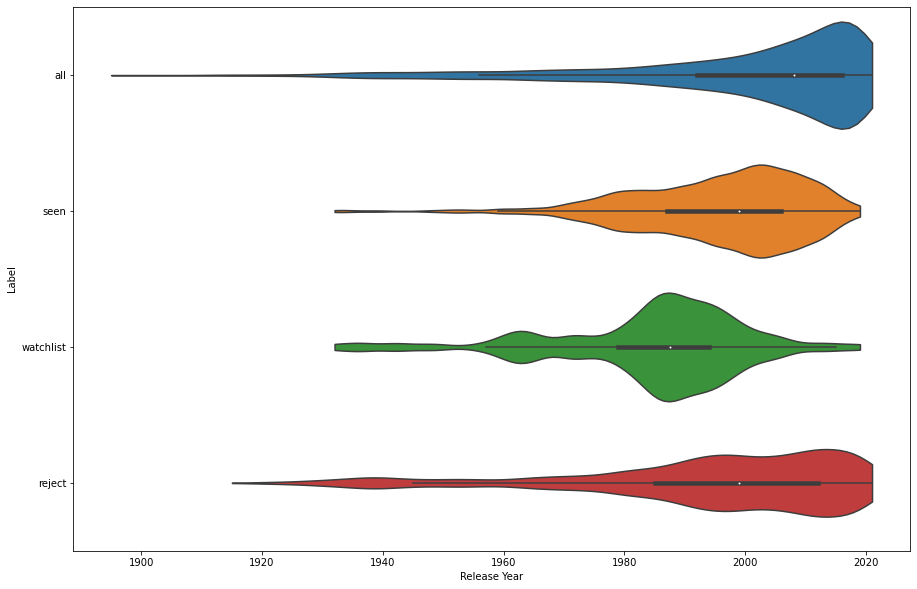

In [14]:
plt.figure(figsize=(15,10))
sns.violinplot( y='Label', x='Release Year', data=df, bw=0.15, cut=0)
plt.show()

## Number of Films in Datababase by Release Year

The recent collapse in number fo films released is due to a combination of COVID-19 and the fact that more recent films have had less time to become embedded in recommendation graphs.

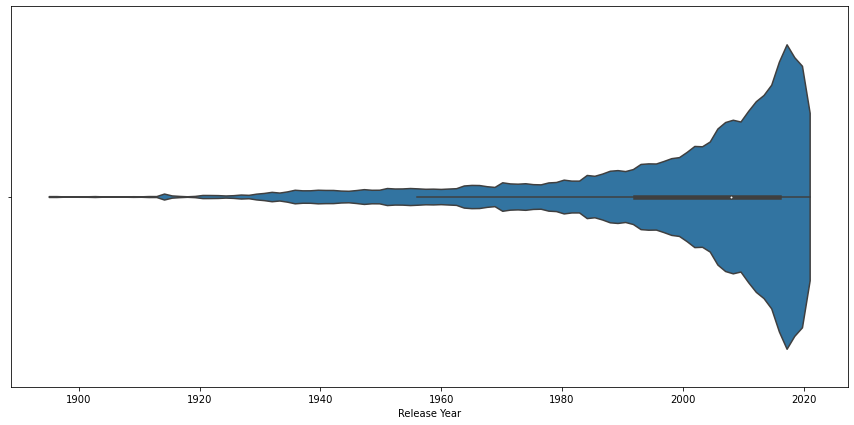

In [23]:
plt.figure(figsize=(15,7))
sns.violinplot( x=df[ df.Label == 'all']['Release Year'], data=df, cut=0, bw=0.02)
plt.show()